# Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

# Business Goal :
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Determine the optimal value of lambda for ridge and lasso regression.
This model will then be used by the management to understand how exactly the prices vary with the variables
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
The model will be a good way for the management to understand the pricing dynamics of a new market.

##### We are going to import some important libraries first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.pandas.set_option("display.max_columns",None)  # to see all the columns

df = pd.read_csv("Surprise_Housing.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape # printing the shape of data

(1460, 81)

In [5]:
 df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### we have int, object, int64 data types

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
x = df.drop(["Id"],axis=1)
y = df["Id"]

for attr in x.columns:
    print("\n",attr)
    print(x[attr].value_counts())


 MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

 MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

 LotArea
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

 Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

 Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

 LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

 LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dt

In [9]:
df.isnull().sum().to_frame()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


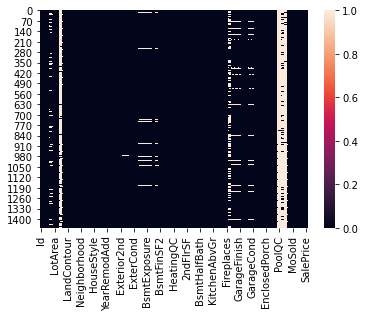

In [10]:
sns.heatmap(df.isnull())

##### There are some missing values are present

In [11]:
# Finding missing values in percentage upto 4 decimal

df_null = [features for features in df.columns if df[features].isnull().sum()>1]

for features in df_null:
    print(features, np.round(df[features].isnull().mean(),4),  " % Missing values")

LotFrontage 0.1774  % Missing values
Alley 0.9377  % Missing values
MasVnrType 0.0055  % Missing values
MasVnrArea 0.0055  % Missing values
BsmtQual 0.0253  % Missing values
BsmtCond 0.0253  % Missing values
BsmtExposure 0.026  % Missing values
BsmtFinType1 0.0253  % Missing values
BsmtFinType2 0.026  % Missing values
FireplaceQu 0.4726  % Missing values
GarageType 0.0555  % Missing values
GarageYrBlt 0.0555  % Missing values
GarageFinish 0.0555  % Missing values
GarageQual 0.0555  % Missing values
GarageCond 0.0555  % Missing values
PoolQC 0.9952  % Missing values
Fence 0.8075  % Missing values
MiscFeature 0.963  % Missing values


### We have to find out, if there is any relationship between Missing values & Sales price

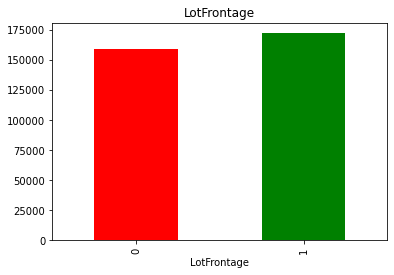

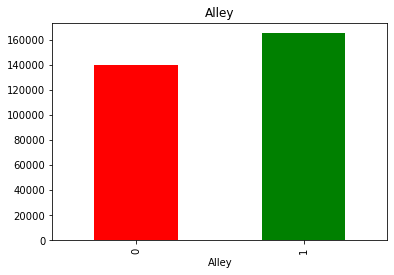

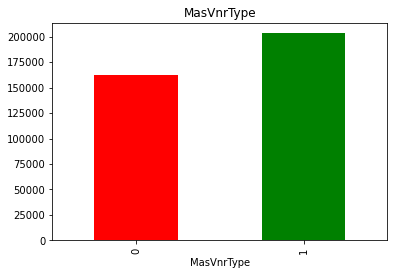

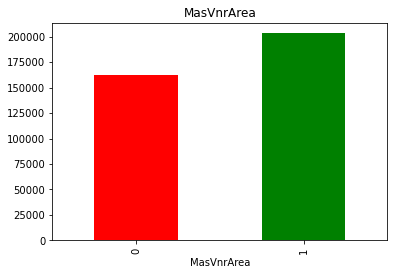

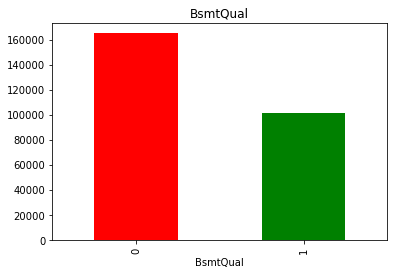

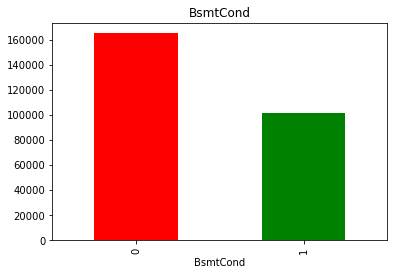

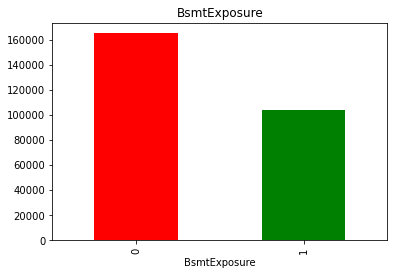

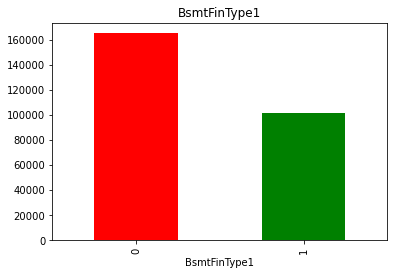

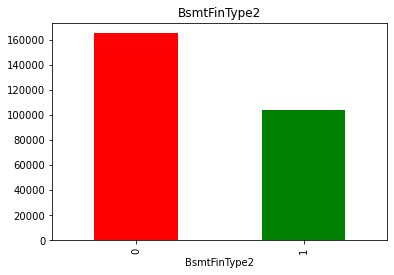

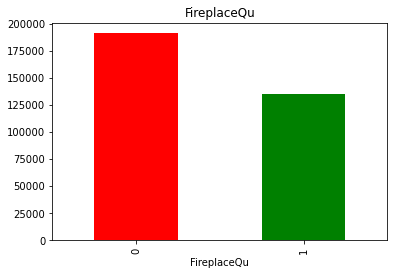

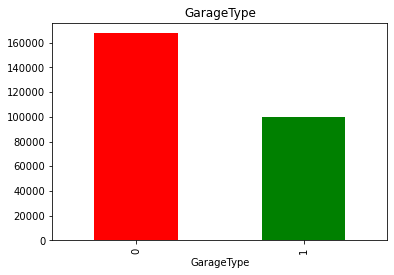

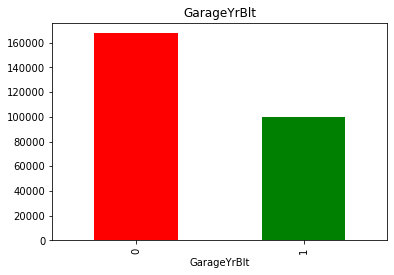

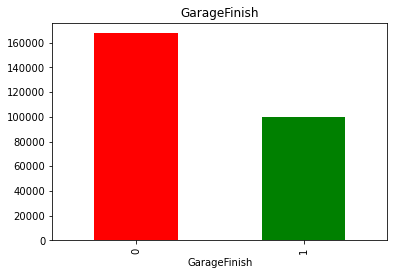

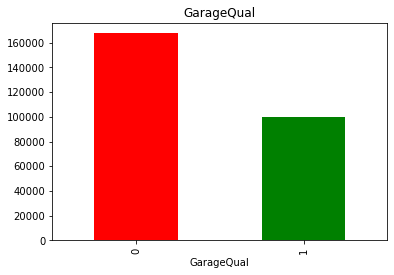

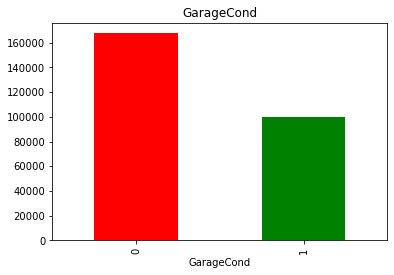

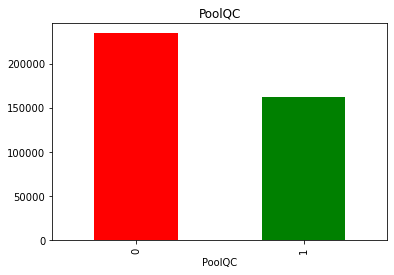

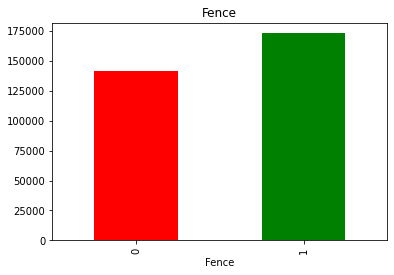

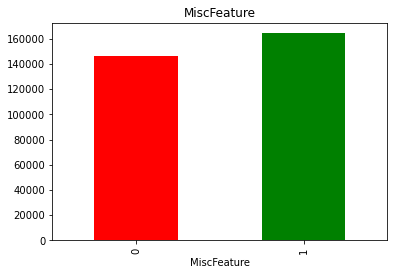

In [12]:
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.

#plt.bar(len(train_class), train_class, color=my_colors)
for feature in df_null:
    df1 = df.copy()
    
    # 1 represent null values, otherwise zero for countplot
    df1[feature] = np.where(df1[feature].isnull(), 1, 0)
    
    
    # we are calculating the mean of Saleprice where information is missing or present
    df1.groupby(feature)["SalePrice"].median().plot.bar(color = my_colors)
    plt.title(feature)
    plt.show()

### There is a strong relationship between missing values and dependent variables
### we will treat them later in feature selection

## Numerical values

In [13]:
# O representing the Object
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

print("Number of numerical variables: ", len(numerical_features))

# visulaize the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


##### Temproray variables

In [14]:
year_feature = [feature for feature in numerical_features if "Yr" in feature or "Year" in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [15]:
# let's dig in it or how many years we have in these columns
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

## Finding relationship between these Year column with SalePrice

Text(0.5, 1.0, 'House Price vs YearSold')

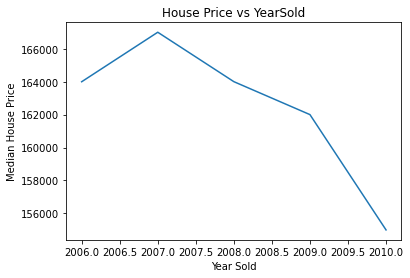

In [16]:
df.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("House Price vs YearSold")

##### Now we will compare the diffrence between all year features with SalePrice

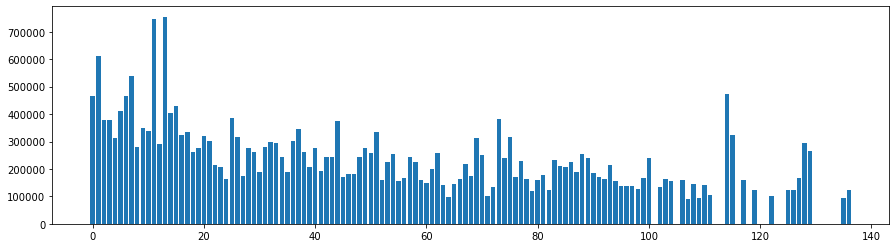

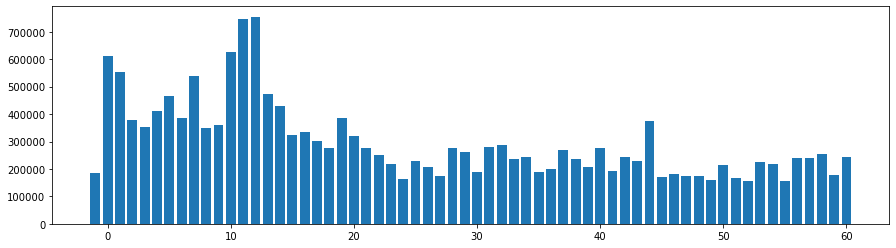

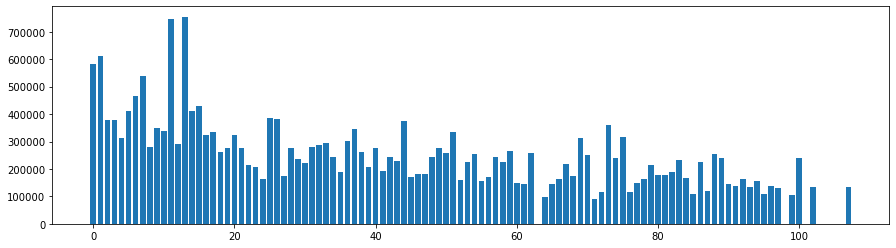

In [17]:

for feature in year_feature:
    if feature !="YrSold":
        df2 = df.copy()
        df2[feature] = df2["YrSold"]-df2[feature]
        plt.figure(figsize=(15,4))
        plt.bar(df2[feature],df2["SalePrice"])
        plt.subplot()
        plt.show()

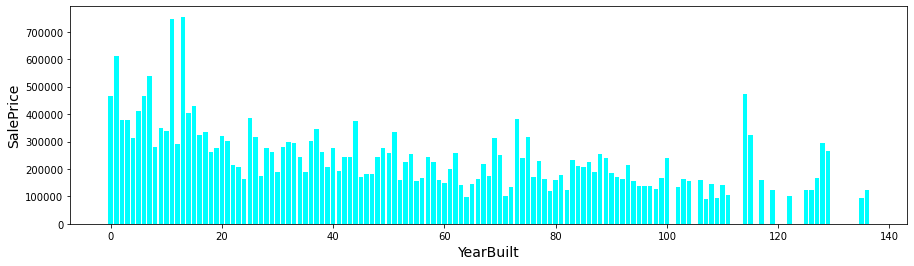

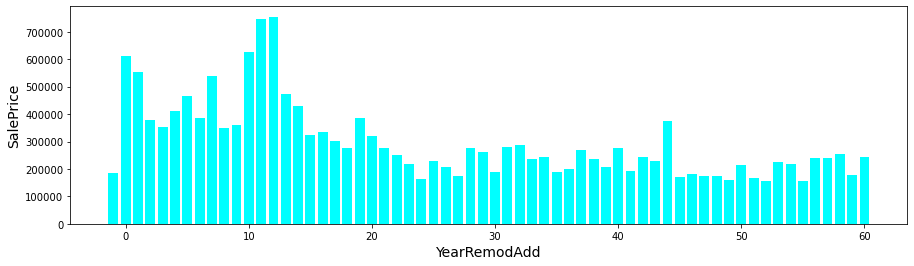

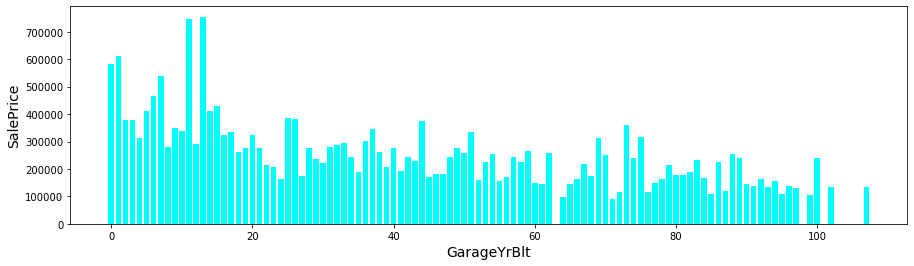

In [18]:

for feature in year_feature:
    if feature !="YrSold":
        df2 = df.copy()
        df2[feature] = df2["YrSold"]-df2[feature]
        plt.figure(figsize=(15,4))
        plt.bar(df2[feature],df2["SalePrice"],color="aqua")
        plt.xlabel(feature,fontsize=14)
        plt.ylabel("SalePrice",fontsize=14)
        plt.show()

### Let's find out numerical variables are Continuous variable or Discrete variable
### But first we will see the heatmap for numerical features

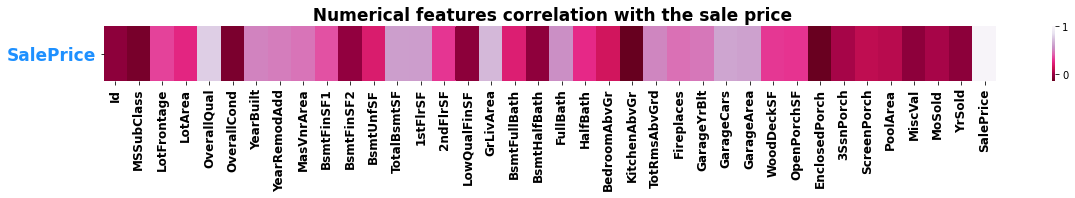

In [19]:
num=df.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=17)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold', color='dodgerblue', rotation=0,fontsize=17)

plt.show()


##### we can see the higher correlation between sale price and "OverallQual, Neighborhood, GrLivArea, GrLivArea.." , which is logical , better quality and bigger area = Higher price.

In [20]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+["Id"]]
print("Discrete Variables Count : {}".format(len(discrete_features)))
discrete_features 

Discrete Variables Count : 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [21]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


### Finding relationship between discreate features & SalePrice

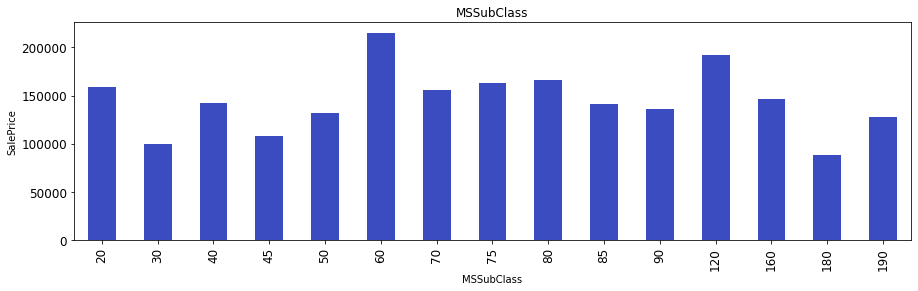

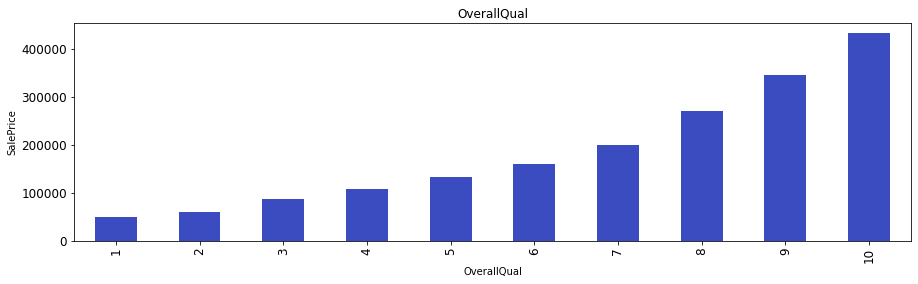

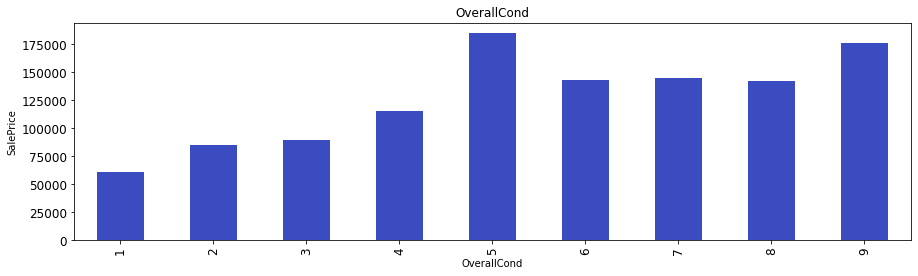

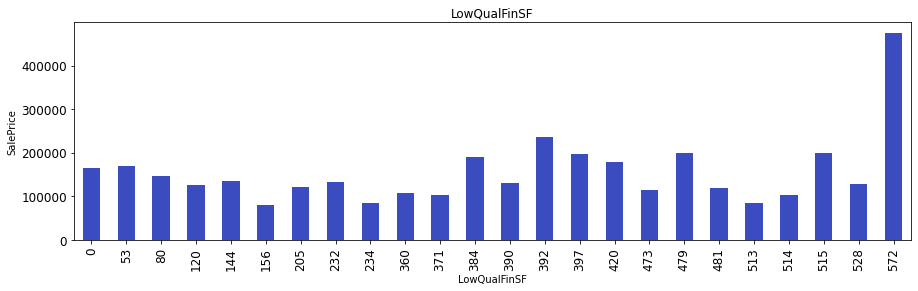

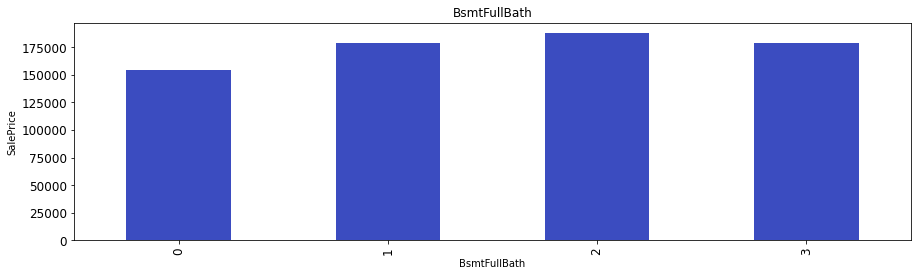

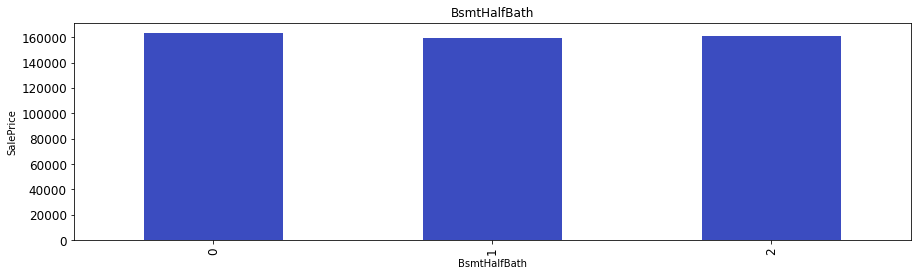

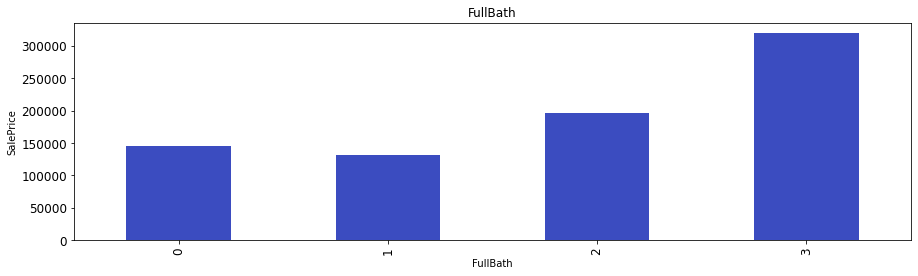

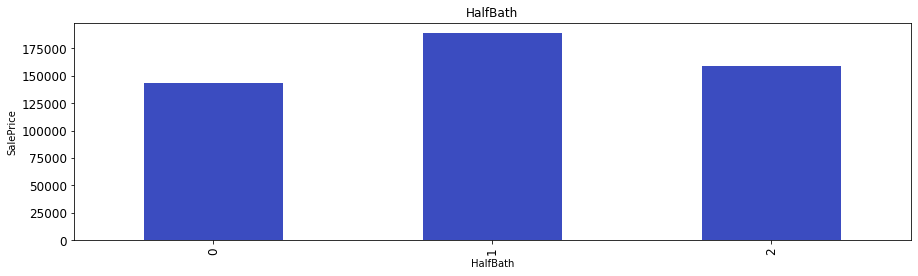

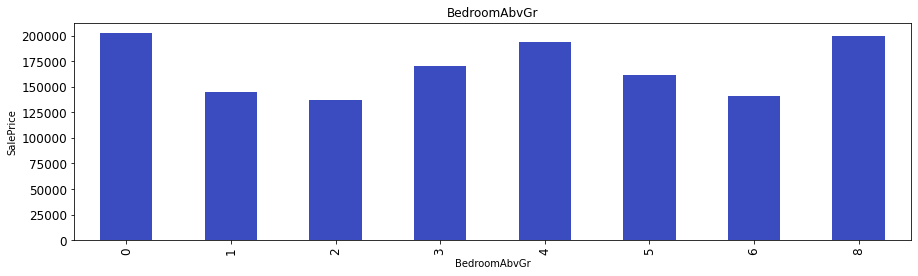

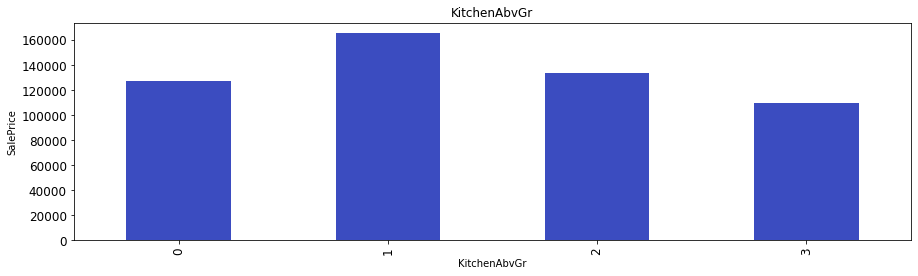

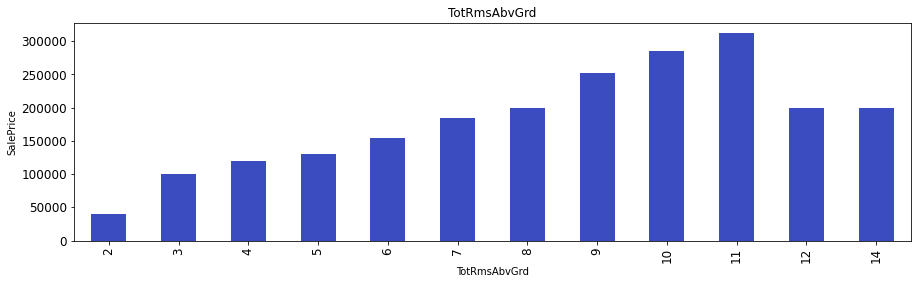

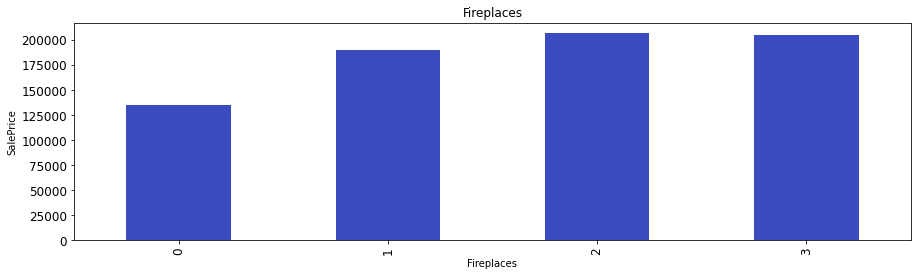

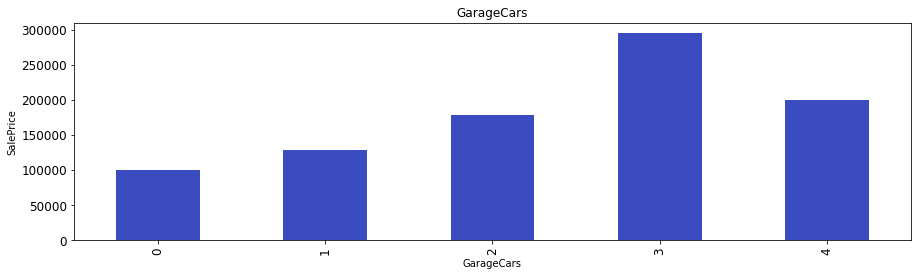

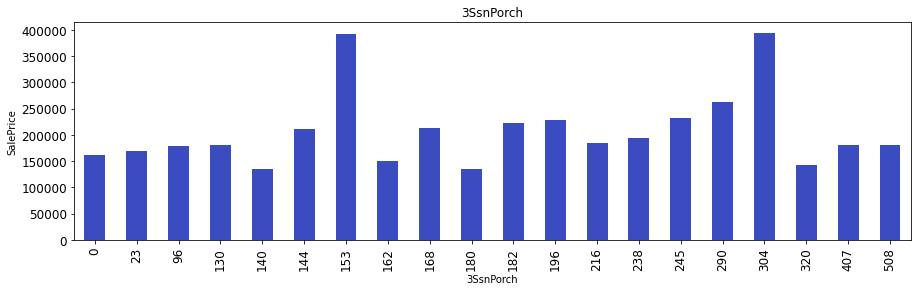

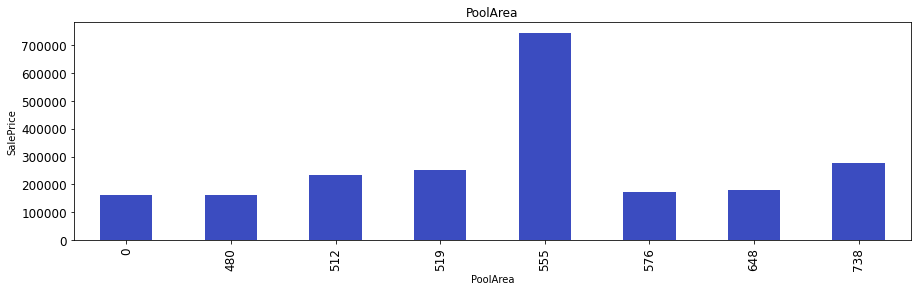

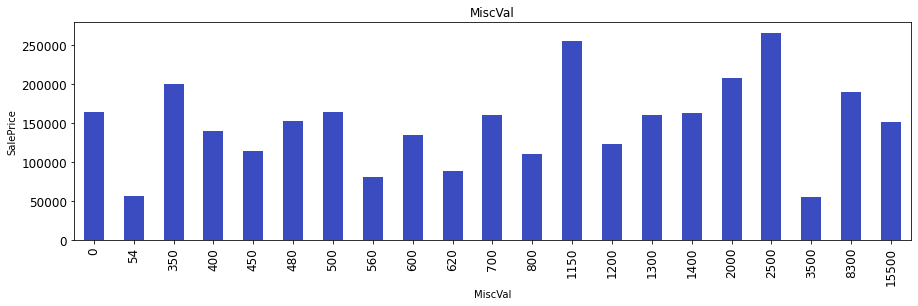

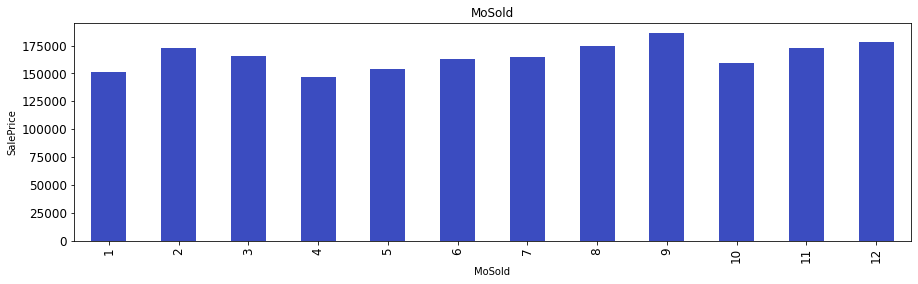

In [22]:
# my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
for feature in discrete_features:
    df3 = df.copy()
    df3.groupby(feature)["SalePrice"].median().plot(kind="bar", figsize=(15,4),legend=False,fontsize=12,colormap="coolwarm")

    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

### having monotonic relationship between discrete features & SalePrice

## Continuous Variable

In [23]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+year_feature+["Id"]]
print("Continuous Feature Count: {}".format(len(continuous_features)))
continuous_features

Continuous Feature Count: 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

### Let's see the distibution of continuous features by creating histogram

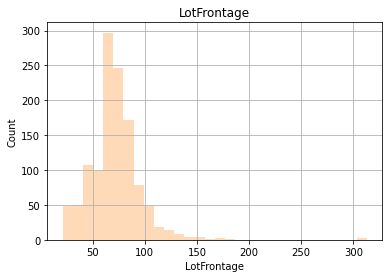

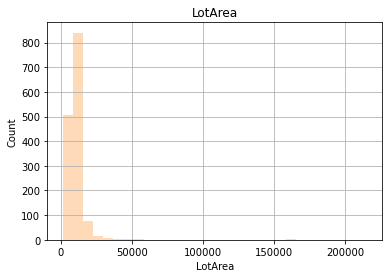

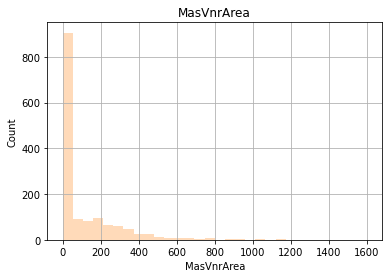

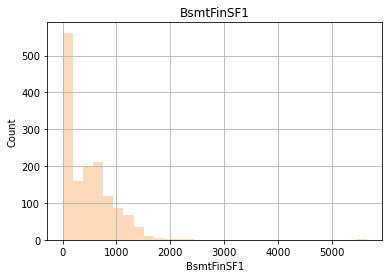

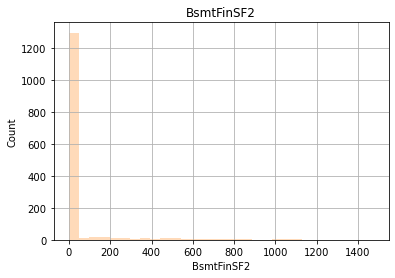

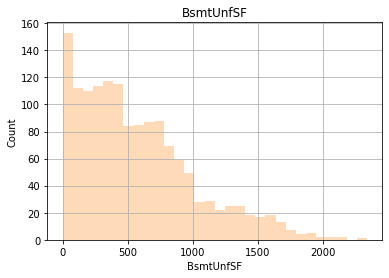

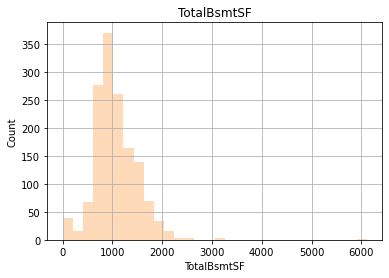

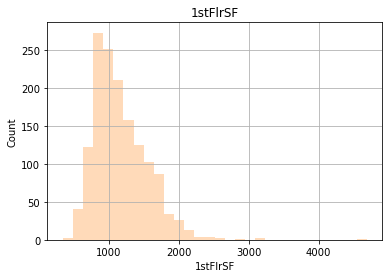

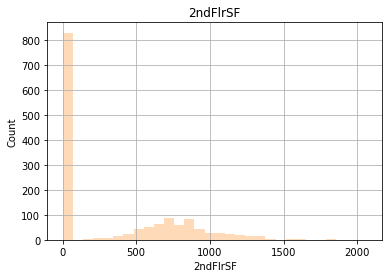

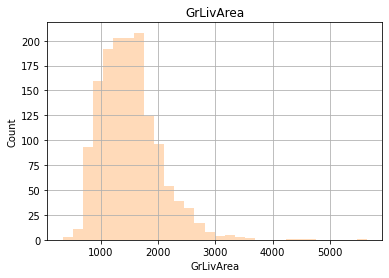

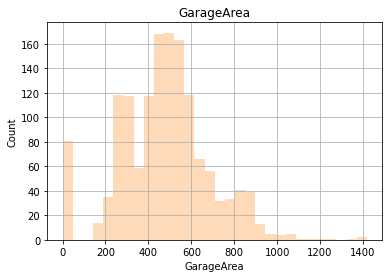

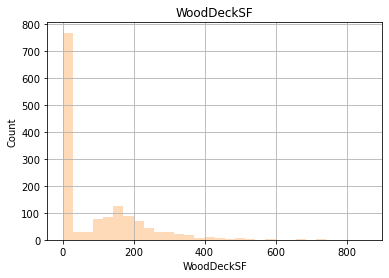

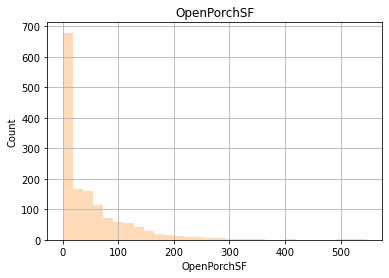

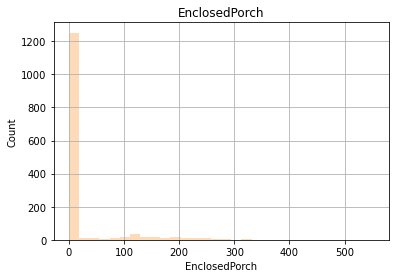

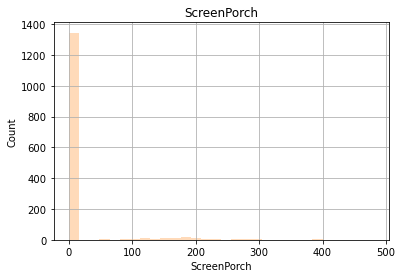

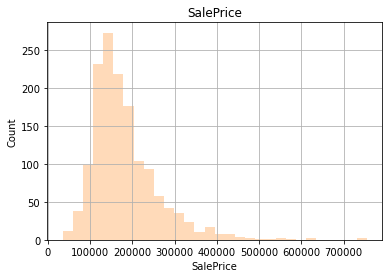

In [24]:
for feature in continuous_features:
    df4 = df.copy()
    df4[feature].hist(bins=30,color="peachpuff")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Logrithimic Transformation

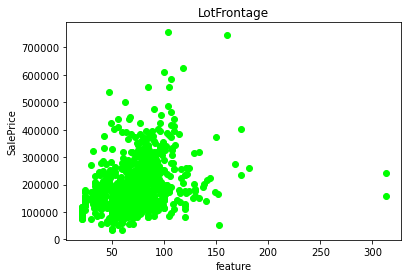

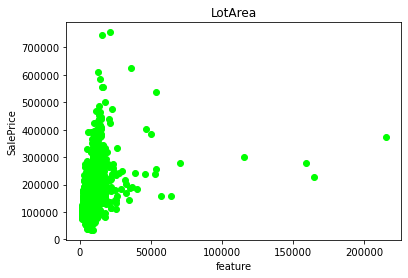

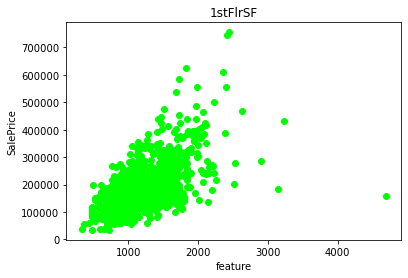

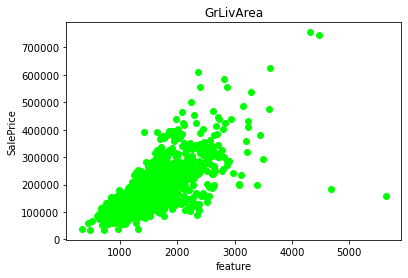

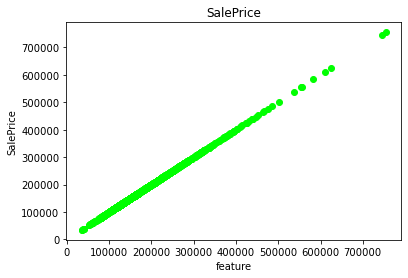

In [25]:
for feature in continuous_features: 
    df5 = df.copy()
    if 0 in df5[feature].unique():
        pass
    else:
        df5[feature] = np.log(df5[feature])
        df5["SalePrice"] = np.log(df5["SalePrice"])
        plt.scatter(df[feature],df["SalePrice"],color="lime")
        plt.xlabel("feature")
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

# Searching for Outlier

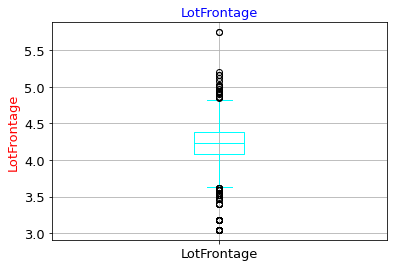

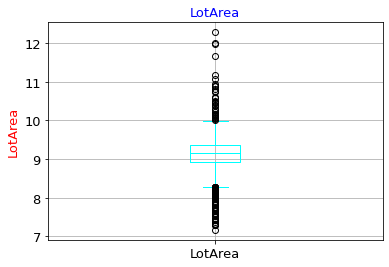

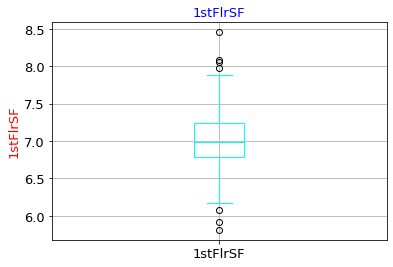

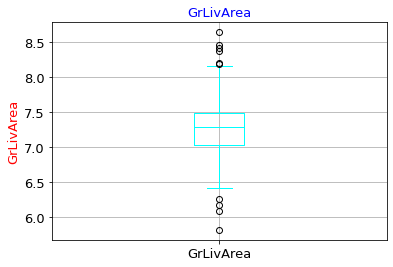

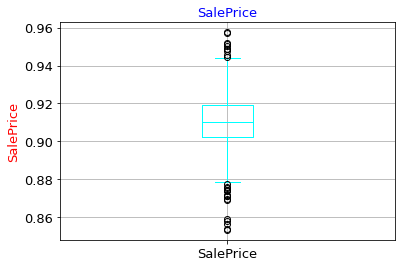

In [26]:
for feature in continuous_features:
    if 0 in df5[feature].unique():
        pass
    else:
        df5[feature]=np.log(df5[feature])
        df5.boxplot(column=feature,color="cyan",fontsize=13)
        plt.ylabel(feature,color="red",fontsize=13)
        plt.title(feature,color="blue",fontsize=13)
        plt.show()

##### There are some outlier's are present 

## Categorical Varoiables 

In [27]:
categorical_features  = [feature for feature in df.columns if df5[feature].dtypes=="O"]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [29]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature,len(df[features].unique())))
    

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 5
The feature is Alley and number of categories are 5
The feature is LotShape and number of categories are 5
The feature is LandContour and number of categories are 5
The feature is Utilities and number of categories are 5
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 5
The feature is Neighborhood and number of categories are 5
The feature is Condition1 and number of categories are 5
The feature is Condition2 and number of categories are 5
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 5
The feature is RoofStyle and number of categories are 5
The feature is RoofMatl and number of categories are 5
The feature is Exterior1st and number of categories are 5
The feature is Exterior2nd and number of categories are 5
The feature is MasVnrType and number of categor

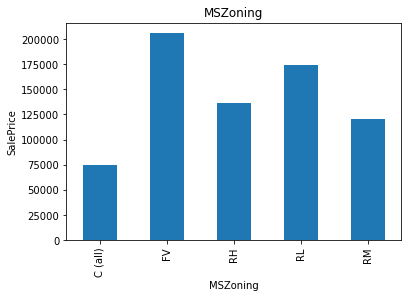

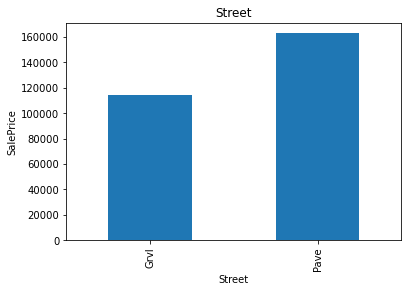

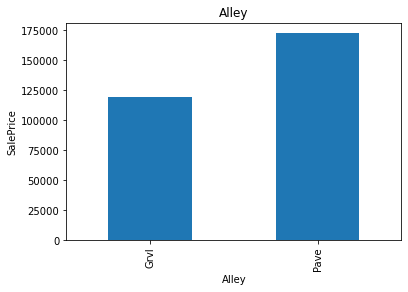

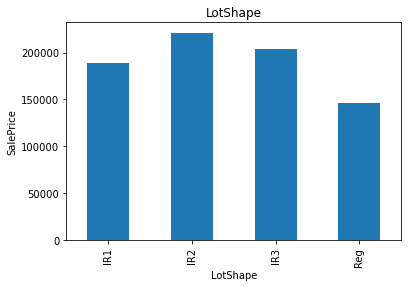

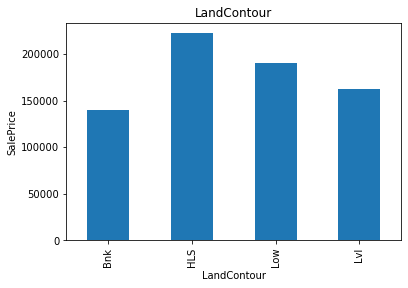

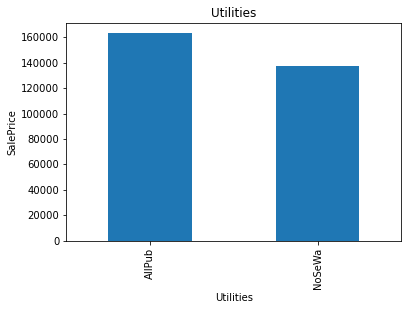

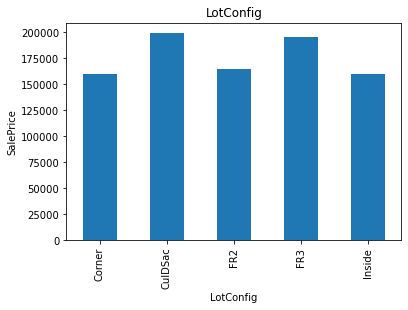

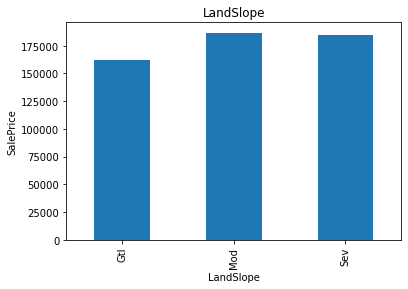

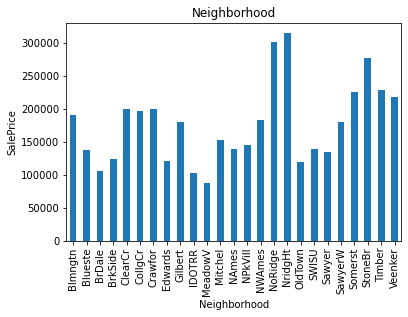

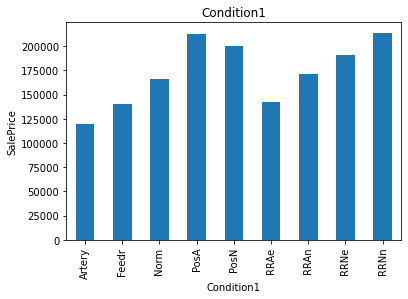

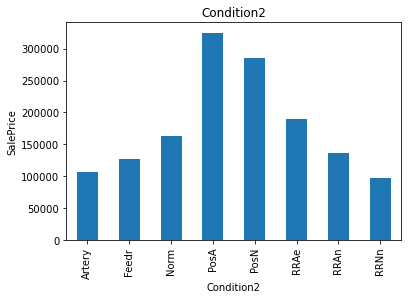

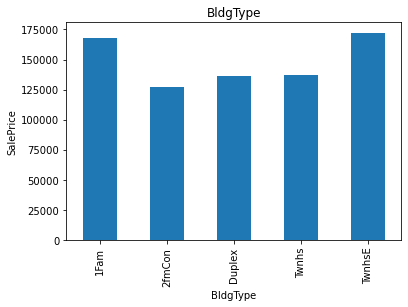

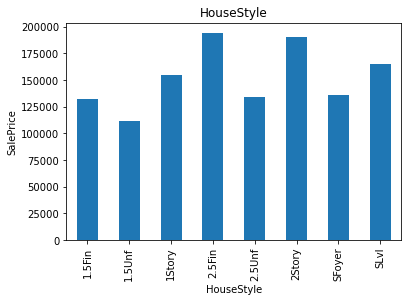

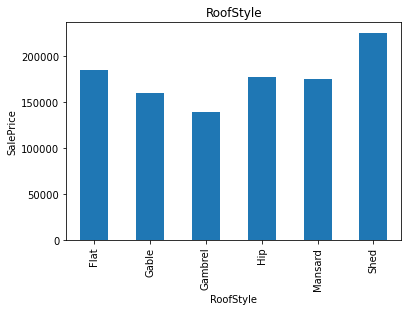

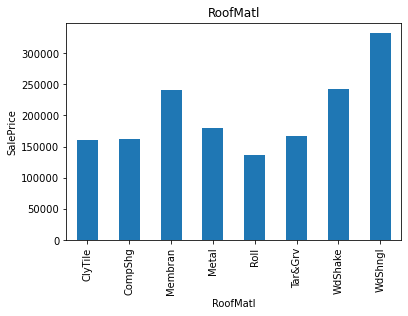

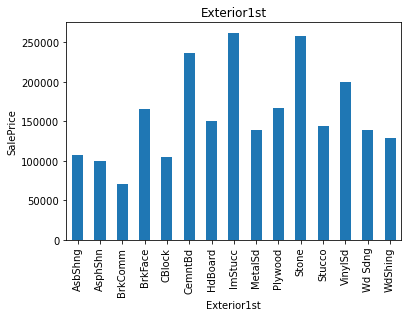

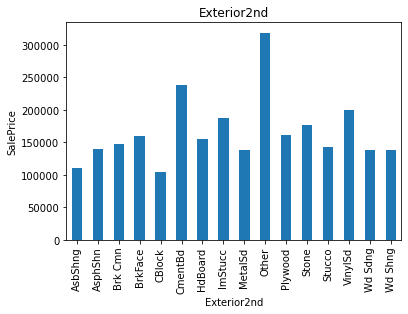

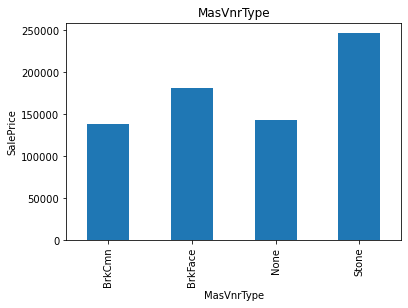

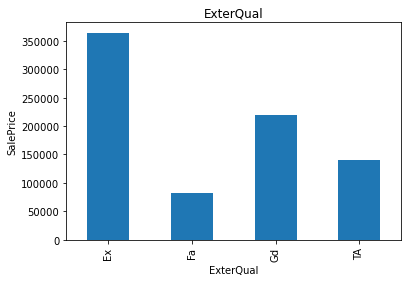

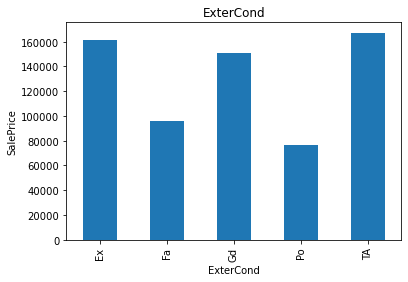

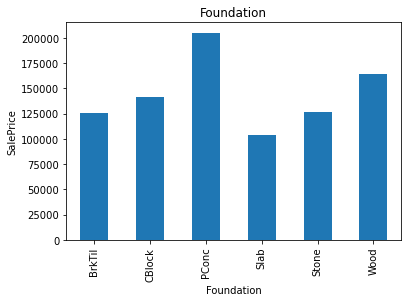

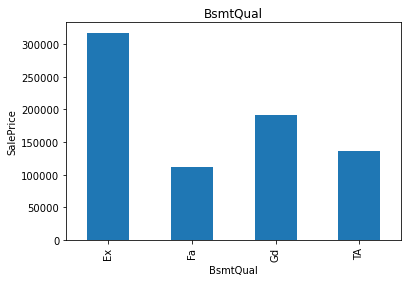

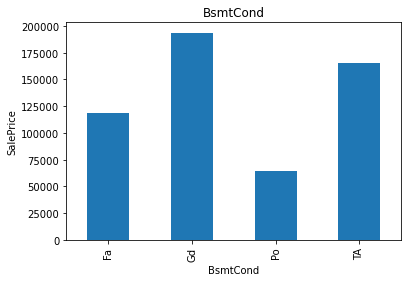

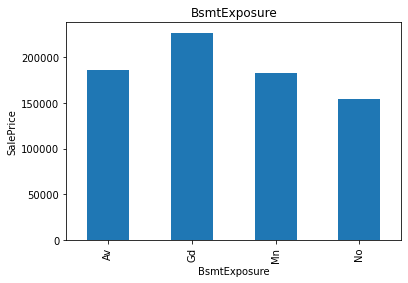

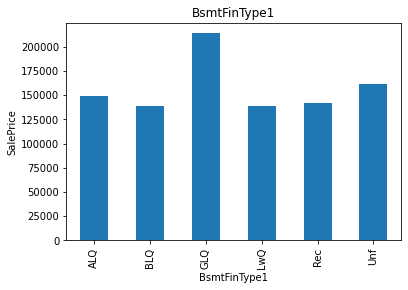

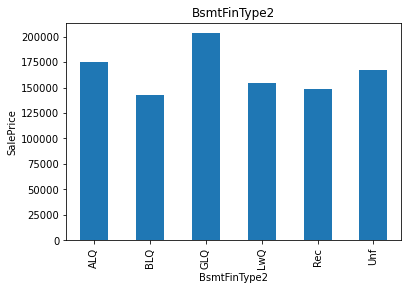

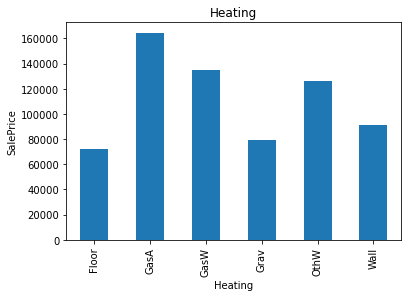

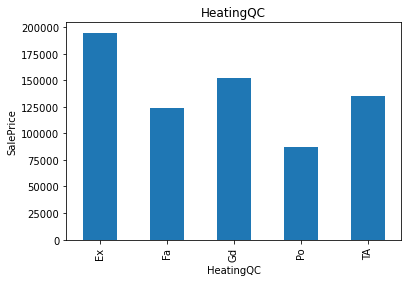

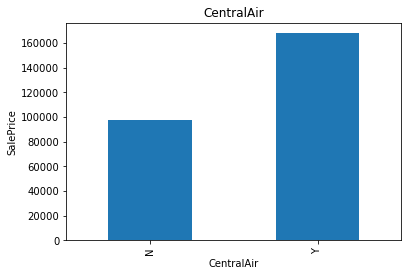

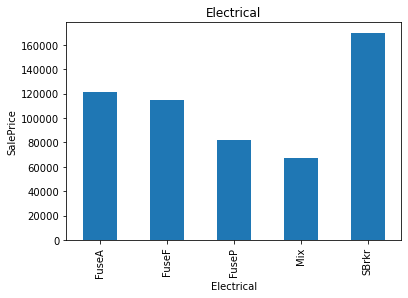

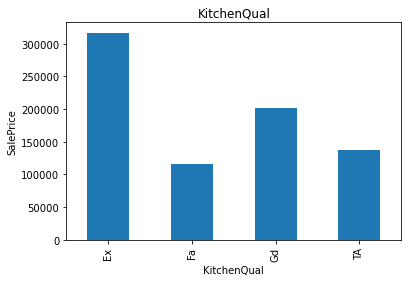

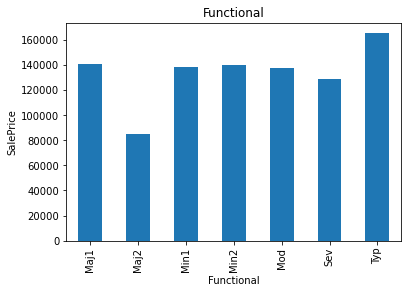

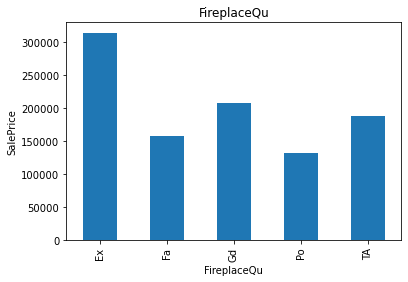

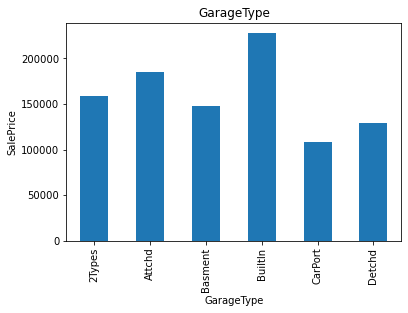

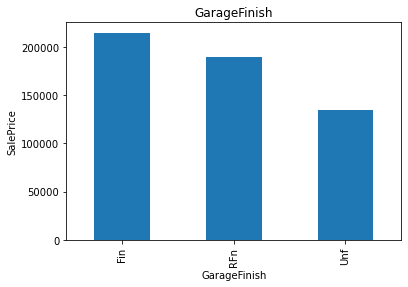

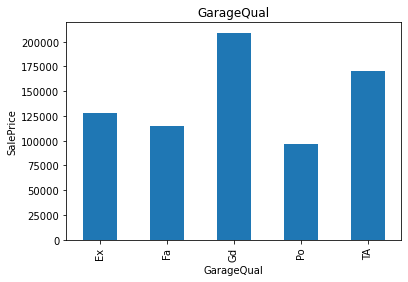

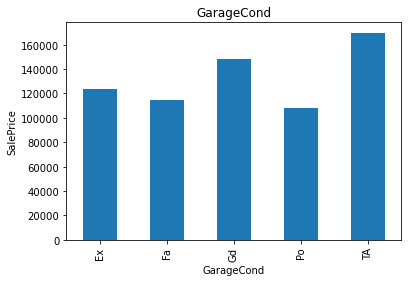

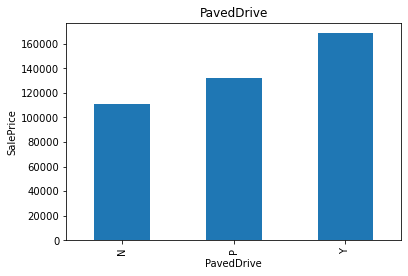

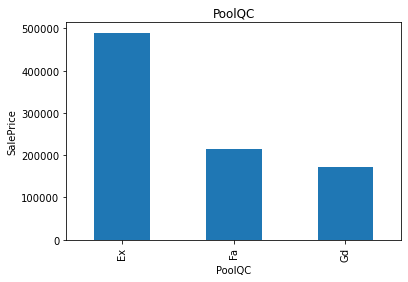

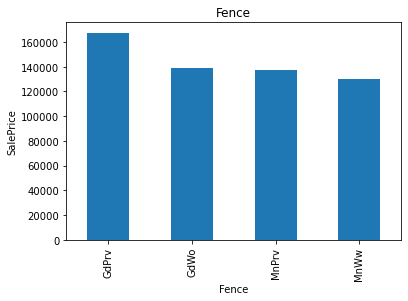

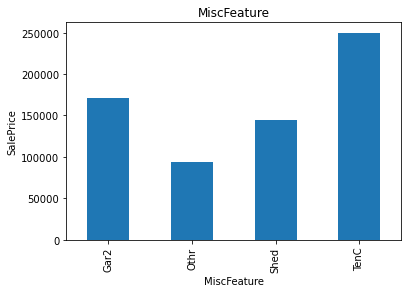

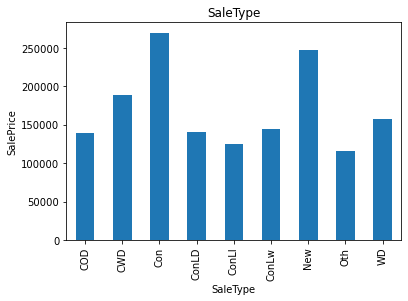

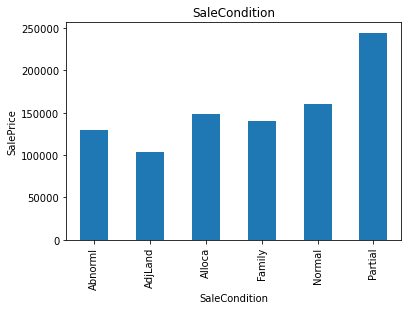

In [30]:
for feature in categorical_features:
    df6 = df.copy()
    df6.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

## Feature engineering

## Missing Values
### Treating Categorical features which are missing

In [31]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=="O"]

for feature in feature_nan:
    print(" {}: {}% Missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

 Alley: 0.9377% Missing values
 MasVnrType: 0.0055% Missing values
 BsmtQual: 0.0253% Missing values
 BsmtCond: 0.0253% Missing values
 BsmtExposure: 0.026% Missing values
 BsmtFinType1: 0.0253% Missing values
 BsmtFinType2: 0.026% Missing values
 FireplaceQu: 0.4726% Missing values
 GarageType: 0.0555% Missing values
 GarageFinish: 0.0555% Missing values
 GarageQual: 0.0555% Missing values
 GarageCond: 0.0555% Missing values
 PoolQC: 0.9952% Missing values
 Fence: 0.8075% Missing values
 MiscFeature: 0.963% Missing values


In [32]:
def replace_cat_feature(df,feature_nan):
    df6 = df.copy()
    df[feature_nan] = df6[feature_nan].fillna("Missing")
    return df

df = replace_cat_feature(df,feature_nan)

df[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [33]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


### Finding & Treating missing values for numerical values

In [34]:
numerical_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [35]:
## Replacing the numerical Missing Values

for feature in numerical_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [36]:
df.head(40)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Mis

### Termporal variable

In [37]:
for feature in ["YearBuilt", "YearRemodAdd","GarageYrBlt"]:
    df[feature] = df["YrSold"]-df[feature]
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420

In [38]:
df[["YearBuilt","YearRemodAdd","GarageYrBlt"]].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
5,16,14,16.0
6,3,2,3.0
7,36,36,36.0
8,77,58,77.0
9,69,58,69.0


# We will use log normal distribution for numerical Variables for skewed

In [39]:
num_features = ["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea", "SalePrice"]

for feature in num_features:
    df[feature] = np.log(df[feature])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


## Handling Categorical Feature


In [40]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=="O"]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [41]:
for feature in categorical_features:
    temp = df.groupby(feature)["SalePrice"].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],"Rare_var")
df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.234107,9.186560,Pave,Missing,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,6.522093,790,0,7.293018,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,16.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,Missing,Missing,Shed,480,4,2009,WD,Normal,12.128111,1,0,0
96,97,20,RL,4.356709,9.236398,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162,Unf,0,426,1588,GasA,Ex,Y,SBrkr,7.370231,0,0,7.370231,0,0,2,0,3,1,Gd,6,Typ,0,Missing,Attchd,7.0,RFn,2,472,TA,TA,Y,158,29,0,0,0,0,Missing,Missing,Missing,0,8,2006,WD,Normal,12.273731,0,0,0
97,98,20,RL,4.290459,9.298443,Pave,Missing,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,42,42,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520,Unf,0,440,960,GasA,TA,Y,FuseF,6.866933,0,0,6.8

In [42]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,0,0,9,2,1,3,1,5,5,16,14,0,0,10,10,1,0.0,1,3,3,3,3,1,6,732,5,0,64,796,2,4,1,3,6.679599,566,0,7.216709,1,0,1,1,1,1,1,5,4,0,1,4,16.0,1,2,480,2,3,2,40,30,0,320,0,0,0,2,1,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,0,0,18,2,1,3,3,8,5,3,2,0,0,10,10,4,186.0,2,3,4,4,3,3,6,1369,5,0,317,1686,2,4,1,3,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,4,1,4,4,3.0,2,2,636,2,3,2,255,57,0,0,0,0,0,4,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,1,0,12,5,1,3,5,7,6,36,36,0,0,6,5,4,240.0,1,3,2,3,3,2,4,859,1,32,216,1107,2,4,1,3,7.009409,983,0,7.644919,1,0,2,1,3,1,1,7,4,2,3,4,36.0,2,2,484,2,3,2,235,204,228,0,0,0,0,4,1,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,0,0,4,0,1,3,1,7,5,77,58,0,0,8,4,1,0.0,1,3,1,2,3,1,5,0,5,0,952,952,2,3,1,1,6.929517,752,0,7.480992,0,0,2,0,2,2,1,8,3,2,3,2,77.0,1,2,468,1,3,2,90,0,205,0,0,0,0,4,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,1,0,3,0,0,0,2,5,6,69,58,0,0,4,3,1,0.0,1,3,1,2,3,1,6,851,5,0,140,991,2,4,1,3,6.981935,0,0,6.981935,1,0,1,0,2,2,1,5,4,2,3,4,69.0,2,1,205,3,3,2,0,4,0,0,0,0,0,4,2,0,1,2008,2,3,11.678440,0,0,0


In [43]:
scaling_feature=[feature for feature in df.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [44]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [45]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


# Feature Scaling

In [46]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [47]:
scaler.transform(df[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [48]:
# transform the train and test set, and add on the Id and SalePrice variables
new_df = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

# Feature Selection

In [49]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [50]:
new_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [51]:
## drop dependent feature from dataset
X = new_df.drop(['Id','SalePrice'],axis=1)
## Capture the dependent feature
y = new_df.SalePrice

In [52]:
print("X Shape: {}".format(X.shape))
print("y Shape: {}".format(y.shape))

X Shape: (1460, 82)
y Shape: (1460,)


In [53]:
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=100)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=100))

In [54]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [55]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]
 
# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 21
features with coefficients shrank to zero: 61


In [56]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

##### We have 21 selected features from these, we will predict

In [57]:
X = X[selected_feat]

In [58]:
X.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [59]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

# Splitting train and test

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 21)
(438, 21)
(1022,)
(438,)


In [61]:
# Scaling the numeric columns 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[ 0.07337496,  0.35904396,  0.5519126 , ...,  0.31172464,
         0.28974476,  0.18301409],
       [-0.87256276,  0.35904396,  0.04127103, ...,  0.31172464,
         0.28974476,  0.18301409],
       [ 0.07337496,  0.35904396,  0.5519126 , ...,  0.31172464,
         0.28974476,  0.18301409],
       ...,
       [ 0.30985939,  0.35904396,  0.89234031, ..., -1.02685765,
         0.28974476,  0.18301409],
       [-0.87256276,  0.35904396, -0.46937054, ..., -1.02685765,
         0.28974476,  0.18301409],
       [-0.87256276,  0.35904396, -0.9800121 , ..., -1.02685765,
         0.28974476,  0.18301409]])

# Model Building

## Ridge Regularization

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge Regressor
ridge = Ridge()

# Specify number of folds in KFold crossvalidation
folds = 5
params = {'alpha':[0.001,0.01,0.1,1,10,30,50,80,100]}

cv_model_ridge = GridSearchCV(estimator=ridge,param_grid=params,cv=folds,verbose=True,scoring='neg_mean_squared_error', \
                        return_train_score=True)
cv_model_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 30, 50, 80, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [63]:
cv_results = pd.DataFrame(cv_model_ridge.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003988,0.001093,0.002394,0.000489,0.001,{'alpha': 0.001},-0.015610,-0.024174,-0.021672,-0.015416,-0.015685,-0.018511,0.003689,3,-0.017727,-0.015712,-0.016037,-0.017652,-0.017578,-0.016941,0.000878
1,0.003790,0.001325,0.002992,0.000631,0.01,{'alpha': 0.01},-0.015603,-0.024171,-0.021671,-0.015412,-0.015691,-0.018510,0.003689,2,-0.017727,-0.015712,-0.016037,-0.017652,-0.017578,-0.016941,0.000878
2,0.002793,0.000747,0.001994,0.000631,0.1,{'alpha': 0.1},-0.015541,-0.024147,-0.021671,-0.015374,-0.015749,-0.018496,0.003689,1,-0.017730,-0.015714,-0.016040,-0.017655,-0.017581,-0.016944,0.000879
3,0.002992,0.000893,0.001795,0.000747,1,{'alpha': 1},-0.015196,-0.024052,-0.021891,-0.015287,-0.016399,-0.018565,0.003687,4,-0.017934,-0.015896,-0.016233,-0.017859,-0.017752,-0.017135,0.000882
4,0.003794,0.000402,0.002395,0.000487,10,{'alpha': 10},-0.016672,-0.026504,-0.026592,-0.018723,-0.022233,-0.022145,0.004011,5,-0.022036,-0.019900,-0.020083,-0.021831,-0.021425,-0.021055,0.000892
5,0.002588,0.000789,0.002195,0.000977,30,{'alpha': 30},-0.020158,-0.031502,-0.032666,-0.023706,-0.029523,-0.027511,0.004798,6,-0.027951,-0.025621,-0.025462,-0.027352,-0.026771,-0.026631,0.000966
6,0.002993,0.000894,0.002393,0.000489,50,{'alpha': 50},-0.022913,-0.035131,-0.036415,-0.026793,-0.034403,-0.031131,0.005310,7,-0.031901,-0.029396,-0.029082,-0.031060,-0.030382,-0.030364,0.001042
7,0.006582,0.003919,0.002194,0.000400,80,{'alpha': 80},-0.026751,-0.039800,-0.040911,-0.030571,-0.040473,-0.035701,0.005885,8,-0.036777,-0.034082,-0.033658,-0.035739,-0.034910,-0.035033,0.001127
8,0.003990,0.000633,0.001994,0.000630,100,{'alpha': 100},-0.029268,-0.042710,-0.043643,-0.032921,-0.044160,-0.038540,0.006206,9,-0.039755,-0.036962,-0.036505,-0.038643,-0.037702,-0.037914,0.001171


Text(0.5, 1.0, 'Neg_Mean_Squared_Error vs alpha_values')

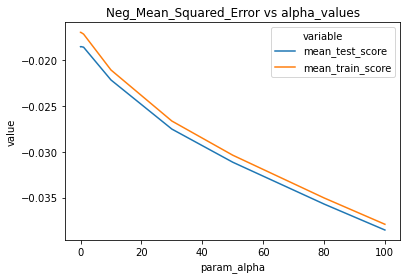

In [64]:
# Plotting the error values vs the alpha parameter
plt.figure()
sns.lineplot(x='param_alpha',y='value',hue='variable',data=cv_results.melt('param_alpha',value_vars=['mean_test_score','mean_train_score']))
plt.title('Neg_Mean_Squared_Error vs alpha_values')

In [65]:
# The best alpha value from the plot is clearly 10. We can also check the attribute of the cv object
cv_model_ridge.best_params_

{'alpha': 0.1}

In [66]:
# Finetuning alpha further
params = {'alpha':[1,3,5,8,10,12,15,18,20]}

cv_model_ridge2 = GridSearchCV(estimator=ridge,param_grid=params,cv=folds,verbose=True,scoring='neg_mean_squared_error', \
                        return_train_score=True)
cv_model_ridge2.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 3, 5, 8, 10, 12, 15, 18, 20]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [67]:
cv_results2 = pd.DataFrame(cv_model_ridge2.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002991,0.000631,0.001994,8.913770e-04,1,{'alpha': 1},-0.015196,-0.024052,-0.021891,-0.015287,-0.016399,-0.018565,0.003687,1,-0.017934,-0.015896,-0.016233,-0.017859,-0.017752,-0.017135,0.000882
1,0.004586,0.001014,0.002593,4.881300e-04,3,{'alpha': 3},-0.015233,-0.024346,-0.022931,-0.015883,-0.017913,-0.019261,0.003709,2,-0.018820,-0.016735,-0.017076,-0.018735,-0.018526,-0.017978,0.000888
2,0.003595,0.000801,0.002599,4.929308e-04,5,{'alpha': 5},-0.015591,-0.024908,-0.024080,-0.016729,-0.019316,-0.020125,0.003775,3,-0.019804,-0.017698,-0.018007,-0.019695,-0.019407,-0.018922,0.000888
3,0.002792,0.000746,0.002394,1.492534e-03,8,{'alpha': 8},-0.016240,-0.025867,-0.025661,-0.017972,-0.021157,-0.021379,0.003913,4,-0.021194,-0.019071,-0.019305,-0.021031,-0.020663,-0.020252,0.000889
4,0.003193,0.000747,0.002592,4.886176e-04,10,{'alpha': 10},-0.016672,-0.026504,-0.026592,-0.018723,-0.022233,-0.022145,0.004011,5,-0.022036,-0.019900,-0.020083,-0.021831,-0.021425,-0.021055,0.000892
5,0.003590,0.000798,0.001595,4.885777e-04,12,{'alpha': 12},-0.017087,-0.027115,-0.027435,-0.019410,-0.023210,-0.022852,0.004108,6,-0.022813,-0.020663,-0.020797,-0.022564,-0.022128,-0.021793,0.000896
6,0.003592,0.000488,0.002391,4.889366e-04,15,{'alpha': 15},-0.017677,-0.027979,-0.028561,-0.020332,-0.024526,-0.023815,0.004247,7,-0.023874,-0.021697,-0.021765,-0.023558,-0.023086,-0.022796,0.000905
7,0.004587,0.001954,0.002793,1.163988e-03,18,{'alpha': 18},-0.018228,-0.028779,-0.029553,-0.021147,-0.025701,-0.024681,0.004375,8,-0.024829,-0.022624,-0.022633,-0.024450,-0.023949,-0.023697,0.000916
8,0.002992,0.000892,0.001994,4.101908e-07,20,{'alpha': 20},-0.018576,-0.029281,-0.030154,-0.021642,-0.026423,-0.025215,0.004455,9,-0.025418,-0.023192,-0.023167,-0.024998,-0.024481,-0.024251,0.000924


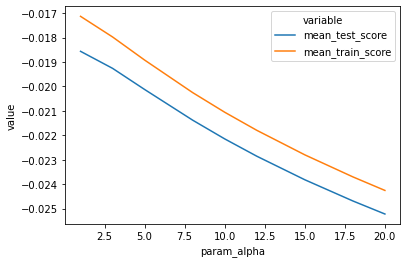

In [68]:
#Plotting the error vs alpha values
plt.figure()
sns.lineplot(x='param_alpha',y='value',hue='variable',data=cv_results2.melt(id_vars='param_alpha',value_vars=['mean_test_score','mean_train_score']))

In [69]:
# Using the best final model to do prediction 
final_ridge = cv_model_ridge2.best_estimator_
final_ridge

Ridge(alpha=1)

In [70]:
# Using final ridge to fit our data
final_ridge.fit(X_train,y_train)
final_ridge.coef_

array([-0.09901083,  0.09170424,  0.25279978,  0.48460656, -0.09318843,
        0.01212529,  0.09610659,  0.09942607,  0.03258242,  0.09229505,
        0.21469182,  0.99740376,  0.18789595,  0.09088198,  0.0627704 ,
        0.06001446,  0.03084887,  0.0308008 ,  0.15638318,  0.02315872,
        0.09617652])

In [71]:
# Create a series to hold the coefs
ridge_coefs = pd.Series(final_ridge.coef_ , index=X_train.columns)
ridge_coefs.head(10)

MSSubClass     -0.099011
MSZoning        0.091704
Neighborhood    0.252800
OverallQual     0.484607
YearRemodAdd   -0.093188
RoofStyle       0.012125
BsmtQual        0.096107
BsmtExposure    0.099426
HeatingQC       0.032582
CentralAir      0.092295
dtype: float64

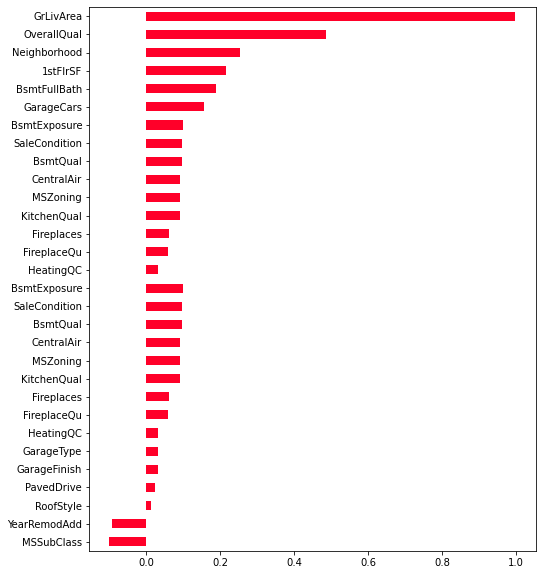

In [72]:
# Plot the top positive and negative coefs
imp_ridge_coefs = pd.concat([ridge_coefs.sort_values().head(15),ridge_coefs.sort_values().tail(15)])
plt.figure(figsize=(8,10))
imp_ridge_coefs.plot(kind='barh',cmap="gist_rainbow")

##### GrlivArea & OverallQual affect the price positively
##### YearRemodAdd & MSSubClass affect the price negatively

In [73]:
 from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

y_train_pred_ridge =  final_ridge.predict(X_train)
print(f"Train R2 score: {r2_score(y_train,y_train_pred_ridge)}")
print(f"Train mean_squared_error: {mean_squared_error(y_train,y_train_pred_ridge)}")
print(f"Train mean_absolute_error: {mean_absolute_error(y_train,y_train_pred_ridge)}")
print('\n')
y_test_pred_ridge =  final_ridge.predict(X_test)
print(f"Test R2 score: {r2_score(y_test,y_test_pred_ridge)}")
print(f"Test mean_squared_error: {mean_squared_error(y_test,y_test_pred_ridge)}")
print(f"Test mean_absolute_error: {mean_absolute_error(y_test,y_test_pred_ridge)}")

Train R2 score: 0.8904870015568508
Train mean_squared_error: 0.017222634211179193
Train mean_absolute_error: 0.09409838930100543


Test R2 score: 0.872427794785303
Test mean_squared_error: 0.020990745511761465
Test mean_absolute_error: 0.10043861074369291


In [74]:
# Getting actual Sales value by reversing the log transformation by using antilog
final_saleprice1= pd.DataFrame(np.exp(y_test_pred_ridge),y_test)
final_saleprice1.reset_index(inplace=True)
final_saleprice1.columns = ['Log_Sales','Actual_Final_SalePrice']
final_saleprice1.head()

,Log_Sales,Actual_Final_SalePrice
0,11.699405,107320.174884
1,12.188418,194554.134544
2,12.078239,182058.957229
3,12.271392,209462.221000
4,12.049419,147614.904250


# Lasso Regularization

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Lasso Regressor
lasso = Lasso()

# Specify number of folds in KFold crossvalidation
folds = 10
params = {'alpha':[0.0001,0.0005,0.0008,0.001,0.01,0.1,1,10,30,50,80,100]}

cv_model_lasso = GridSearchCV(estimator=lasso,param_grid=params,cv=folds,verbose=True,scoring='neg_mean_squared_error', \
                        return_train_score=True)
cv_model_lasso.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.0s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.0008, 0.001, 0.01, 0.1, 1,
                                   10, 30, 50, 80, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [76]:
# Selecting the top 4 models for legible visualization
cv_results = pd.DataFrame(cv_model_lasso.cv_results_)
cv_results = cv_results.nsmallest(4,'rank_test_score')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002990,0.000630,0.002493,0.001115,0.0001,{'alpha': 0.0001},-0.014613,-0.015052,-0.012965,-0.033317,-0.019100,-0.026285,-0.015676,-0.015561,-0.016483,-0.015099,-0.018415,0.006085,1,-0.017447,-0.017365,-0.017593,-0.015451,-0.016975,-0.016168,-0.017327,-0.017333,-0.017247,-0.017366,-0.017027,0.000647
1,0.010777,0.023679,0.001895,0.000831,0.0005,{'alpha': 0.0005},-0.014410,-0.014979,-0.012970,-0.032655,-0.019627,-0.025808,-0.015814,-0.015752,-0.017021,-0.015391,-0.018443,0.005842,2,-0.017491,-0.017408,-0.017636,-0.015496,-0.017018,-0.016211,-0.017369,-0.017376,-0.017290,-0.017410,-0.017071,0.000646
2,0.003983,0.001095,0.002694,0.001097,0.0008,{'alpha': 0.0008},-0.014300,-0.014955,-0.013015,-0.032211,-0.020068,-0.025492,-0.015945,-0.015927,-0.017470,-0.015659,-0.018504,0.005674,3,-0.017561,-0.017476,-0.017707,-0.015568,-0.017089,-0.016282,-0.017438,-0.017445,-0.017361,-0.017482,-0.017141,0.000646
3,0.003690,0.001265,0.002293,0.000779,0.001,{'alpha': 0.001},-0.014247,-0.014953,-0.013063,-0.031939,-0.020383,-0.025302,-0.016044,-0.016060,-0.017790,-0.015860,-0.018564,0.005568,4,-0.017627,-0.017540,-0.017772,-0.015635,-0.017155,-0.016347,-0.017501,-0.017509,-0.017427,-0.017548,-0.017206,0.000645


Text(0.5, 1.0, 'Neg_Mean_Squared_Error vs alpha_values')

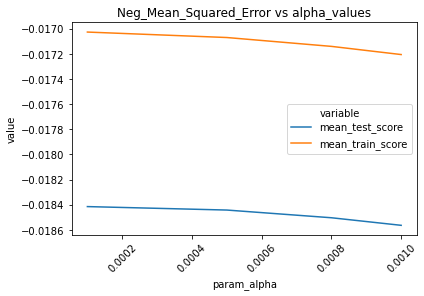

In [77]:
# Plotting the error values vs the alpha parameter
plt.figure()
sns.lineplot(x='param_alpha',y='value',hue='variable',data=cv_results.melt(id_vars='param_alpha',value_vars=['mean_test_score','mean_train_score']))
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Neg_Mean_Squared_Error vs alpha_values')

In [78]:

# The best alpha value from the plot is clearly 0.0005. We can also check the attribute of the cv object
cv_model_lasso.best_params_

{'alpha': 0.0001}

In [79]:
# Finetuning alpha further
folds=5
params = {'alpha':[0.0002,0.0003,0.0005,0.0006,0.0007,0.0009]}

cv_model_lasso2 = GridSearchCV(estimator=lasso,param_grid=params,cv=folds,verbose=True,scoring='neg_mean_squared_error', \
                        return_train_score=True)
cv_model_lasso2.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0002, 0.0003, 0.0005, 0.0006, 0.0007,
                                   0.0009]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [80]:
cv_results2 = pd.DataFrame(cv_model_lasso2.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005186,9.774481e-04,0.002394,0.000798,0.0002,{'alpha': 0.0002},-0.015491,-0.023957,-0.021654,-0.015498,-0.015900,-0.018500,0.003593,2,-0.017735,-0.015719,-0.016044,-0.017659,-0.017586,-0.016949,0.000878
1,0.003989,6.572747e-07,0.002393,0.000798,0.0003,{'alpha': 0.0003},-0.015436,-0.023844,-0.021651,-0.015542,-0.016015,-0.018498,0.003544,1,-0.017743,-0.015728,-0.016054,-0.017668,-0.017595,-0.016958,0.000878
2,0.002793,7.465827e-04,0.001596,0.000489,0.0005,{'alpha': 0.0005},-0.015337,-0.023632,-0.021659,-0.015639,-0.016257,-0.018505,0.003451,3,-0.017772,-0.015758,-0.016083,-0.017695,-0.017625,-0.016987,0.000878
3,0.003590,4.882272e-04,0.002394,0.000489,0.0006,{'alpha': 0.0006},-0.015293,-0.023532,-0.021669,-0.015692,-0.016385,-0.018514,0.003406,4,-0.017792,-0.015778,-0.016103,-0.017714,-0.017646,-0.017007,0.000878
4,0.002992,8.914845e-04,0.001995,0.000631,0.0007,{'alpha': 0.0007},-0.015252,-0.023439,-0.021684,-0.015747,-0.016518,-0.018528,0.003364,5,-0.017815,-0.015801,-0.016127,-0.017736,-0.017670,-0.017030,0.000877
5,0.003790,9.760955e-04,0.001995,0.000631,0.0009,{'alpha': 0.0009},-0.015182,-0.023263,-0.021726,-0.015866,-0.016798,-0.018567,0.003284,6,-0.017872,-0.015860,-0.016186,-0.017791,-0.017730,-0.017088,0.000877


Text(0.5, 1.0, 'Neg_Mean_Squared_Error vs alpha_values')

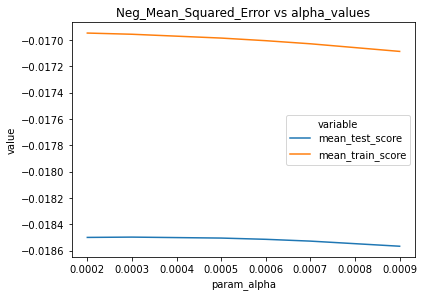

In [81]:
 #Plotting the error values vs the alpha parameter
plt.figure()
sns.lineplot(x='param_alpha',y='value',hue='variable',data=cv_results2.melt(id_vars='param_alpha',value_vars=['mean_test_score','mean_train_score']))
plt.tight_layout()
plt.title('Neg_Mean_Squared_Error vs alpha_values')

In [82]:

# The best alpha value from the plot is clearly 0.0006. We can also check the attribute of the cv object
cv_model_lasso2.best_params_

{'alpha': 0.0003}

In [83]:
# Using the best final model to do prediction 
final_lasso = cv_model_lasso2.best_estimator_
final_lasso

Lasso(alpha=0.0003)

In [84]:
final_lasso.fit(X_train,y_train)
final_lasso.coef_

array([-0.1087386 ,  0.08498932,  0.2579285 ,  0.49303789, -0.09323061,
        0.0110891 ,  0.08617478,  0.10531835,  0.02546102,  0.09506152,
        0.17015673,  1.10829705,  0.19599461,  0.08339611,  0.0457111 ,
        0.05818652,  0.02625205,  0.0307623 ,  0.14335848,  0.02566836,
        0.09584694])

In [85]:
# Create a series to hold the coefs
lasso_coefs = pd.Series(final_lasso.coef_ , index=X_train.columns)
lasso_coefs.head(10)


MSSubClass     -0.108739
MSZoning        0.084989
Neighborhood    0.257928
OverallQual     0.493038
YearRemodAdd   -0.093231
RoofStyle       0.011089
BsmtQual        0.086175
BsmtExposure    0.105318
HeatingQC       0.025461
CentralAir      0.095062
dtype: float64

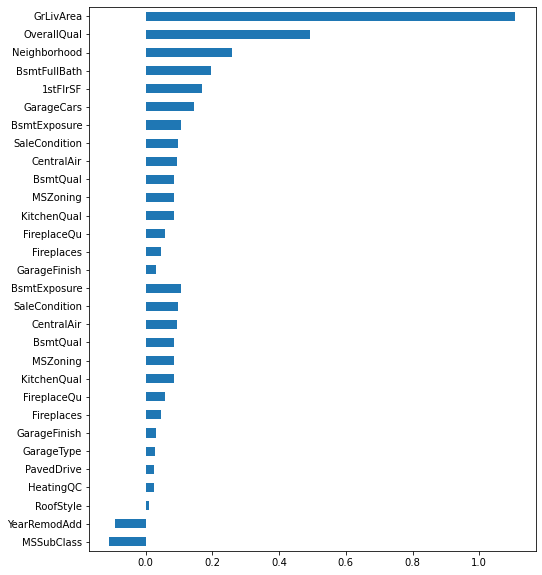

In [86]:
# Plot the top positive and negative coefs
imp_lasso_coefs = pd.concat([lasso_coefs.sort_values().head(15),lasso_coefs.sort_values().tail(15)])
plt.figure(figsize=(8,10))
imp_lasso_coefs.plot(kind='barh')

##### GrlivArea & OverallQual affect the price positively
##### YearRemodAdd & MSSubClass affect the price negatively

In [87]:
# Number of features set to zero
print(f"Number of feature set to zero after Lasso Regression: {lasso_coefs[lasso_coefs == 0].count()}")

Number of feature set to zero after Lasso Regression: 0


In [88]:
# Prediction on the model and check prediction metrics R2 score and Mean squared error 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

y_train_pred_lasso =  final_lasso.predict(X_train)
print(f"Train R2 score: {r2_score(y_train,y_train_pred_lasso)}")
print(f"Train mean_squared_error: {mean_squared_error(y_train,y_train_pred_lasso)}")
print(f"Train mean_absolute_error: {mean_absolute_error(y_train,y_train_pred_lasso)}")
print('\n')
y_test_pred_lasso =  final_lasso.predict(X_test)
print(f"Test R2 score: {r2_score(y_test,y_test_pred_lasso)}")
print(f"Test mean_squared_error: {mean_squared_error(y_test,y_test_pred_lasso)}")
print(f"Test mean_absolute_error: {mean_absolute_error(y_test,y_test_pred_lasso)}")

Train R2 score: 0.8912096799158981
Train mean_squared_error: 0.017108981720542035
Train mean_absolute_error: 0.09381015540693229


Test R2 score: 0.872183025125432
Test mean_squared_error: 0.02103101994011916
Test mean_absolute_error: 0.10047642934894614


In [89]:
# Getting actual Sales value by reversing the log transformation by using antilog
final_saleprice2 = pd.DataFrame(np.exp(y_test_pred_lasso),y_test)
final_saleprice2.reset_index(inplace=True)
final_saleprice2.columns = ['Log_Sales','Actual_Final_SalePrice']
final_saleprice2.head()

,Log_Sales,Actual_Final_SalePrice
0,11.699405,106322.072817
1,12.188418,196371.313634
2,12.078239,180323.447669
3,12.271392,212092.805889
4,12.049419,147145.694306


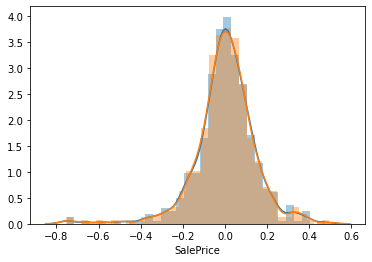

In [90]:
sns.distplot(y_test-y_test_pred_lasso)
(sns.distplot(y_test-y_test_pred_ridge))

##### We can see difference from overlapping of graphs Ridge & Lasso regularization

# Deep Learning Model

In [91]:
import keras 
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.3


In [92]:
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

In [93]:
new_df

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.122500,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.101250,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.218750,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.07

## Training, Validation & Testing

In [94]:
# Spliting the data into train & test
test_percent = 0.30
no_test_obs = int(np.round(test_percent*len(new_df)))
training = new_df[:-no_test_obs]
testing = new_df[-no_test_obs:]

# Breaking testing data into validation and out of sample data
validation_percent = .70
no_validation_obs = int(np.round(validation_percent*len(testing)))
validation = testing[:no_validation_obs]
outofSample = testing[-no_validation_obs:]

## Data Normalization

In [95]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
trainNormal = normalizer.fit_transform(training.values)
validationNormal = normalizer.transform(validation.values)
outofSampleNormal = normalizer.transform(outofSample.values)

## Rescaling Normalized data

In [96]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
trainMinmax = min_max_scaler.fit_transform(trainNormal)
valMinmax = min_max_scaler.transform(validationNormal)
outSampleMinmax = min_max_scaler.transform(outofSampleNormal)

# Model Building

# CNN

In [97]:
from numpy import array

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        #find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the data
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [98]:
n_steps_in = 2
n_steps_out = 1

trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in, n_steps_out)
validationSeq_x, validationSeq_y = split_sequences(valMinmax,n_steps_in, n_steps_out)
outSampleSeq_x, outSampleSeq_y = split_sequences(outSampleMinmax,n_steps_in,n_steps_out)

In [99]:
trainMinmax.shape

(1022, 84)

In [100]:
trainSeq_x.shape

(1021, 2, 83)

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, AveragePooling1D,MaxPooling1D
from keras.layers import Conv1D, AveragePooling1D,MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, Nadam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2, l1_l2 
import random as rn

In [102]:
np.random.seed(11)
rn.seed(10)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=2,inter_op_parallelism_threads=2)
tf.random.set_seed(119)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

EarlyStop = EarlyStopping(monitor="val_loss",patience=10,verbose=0,mode="auto",restore_best_weights=True)
epochs = 10000

bs = 1
lr = 0

sgd = SGD(lr=lr)

X,y = split_sequences(trainMinmax,n_steps_in,n_steps_out)
n_features = X.shape[2]
np.random.seed(0)

model = Sequential()

model.add(Conv1D(filters=5,
                kernel_size=2,
                strides=2,
                activation="linear",
                input_shape=(n_steps_in, n_features)))

model.add(MaxPooling1D(pool_size=1))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1,
               activation="tanh",
               kernel_regularizer=l2(0.01)))

model.compile(loss="mean_squared_error", optimizer="sgd")

model.fit(trainSeq_x,trainSeq_y,
         batch_size=bs,
         epochs=epochs,
         callbacks=[EarlyStop],
         verbose=2,
         shuffle=False,
         validation_data = (validationSeq_x,validationSeq_y))
model.summary()

Epoch 1/10000
1021/1021 - 1s - loss: 0.0696 - val_loss: 0.0306
Epoch 2/10000
1021/1021 - 1s - loss: 0.0241 - val_loss: 0.0226
Epoch 3/10000
1021/1021 - 1s - loss: 0.0204 - val_loss: 0.0186
Epoch 4/10000
1021/1021 - 1s - loss: 0.0185 - val_loss: 0.0161
Epoch 5/10000
1021/1021 - 1s - loss: 0.0170 - val_loss: 0.0152
Epoch 6/10000
1021/1021 - 1s - loss: 0.0166 - val_loss: 0.0150
Epoch 7/10000
1021/1021 - 1s - loss: 0.0159 - val_loss: 0.0140
Epoch 8/10000
1021/1021 - 1s - loss: 0.0141 - val_loss: 0.0136
Epoch 9/10000
1021/1021 - 1s - loss: 0.0131 - val_loss: 0.0130
Epoch 10/10000
1021/1021 - 1s - loss: 0.0140 - val_loss: 0.0130
Epoch 11/10000
1021/1021 - 1s - loss: 0.0136 - val_loss: 0.0126
Epoch 12/10000
1021/1021 - 1s - loss: 0.0126 - val_loss: 0.0125
Epoch 13/10000
1021/1021 - 1s - loss: 0.0134 - val_loss: 0.0125
Epoch 14/10000
1021/1021 - 1s - loss: 0.0127 - val_loss: 0.0122
Epoch 15/10000
1021/1021 - 1s - loss: 0.0121 - val_loss: 0.0121
Epoch 16/10000
1021/1021 - 1s - loss: 0.0122 - va

In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def plot_results(actual_y,predicted_y,method,date):
    
    mse = mean_squared_error(actual_y,predicted_y)
    mae = mean_absolute_error(actual_y,predicted_y)
    r2score = r2_score(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(["Actual","Predicted"])
    plt.title(f"{method} (MSE: {mse})\n{method} (MAE: {mae})\n{method} (R2: {r2score})")
    plt.show

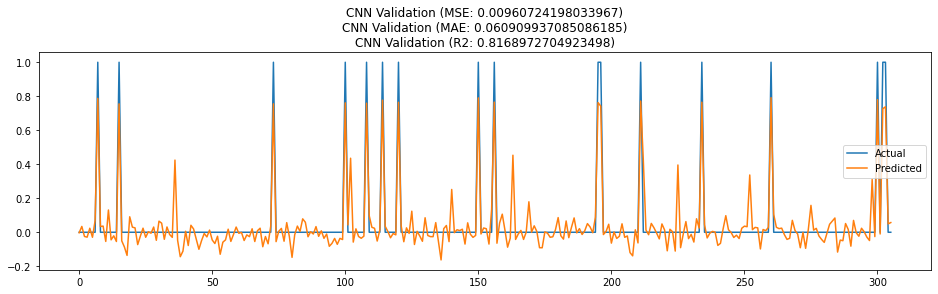

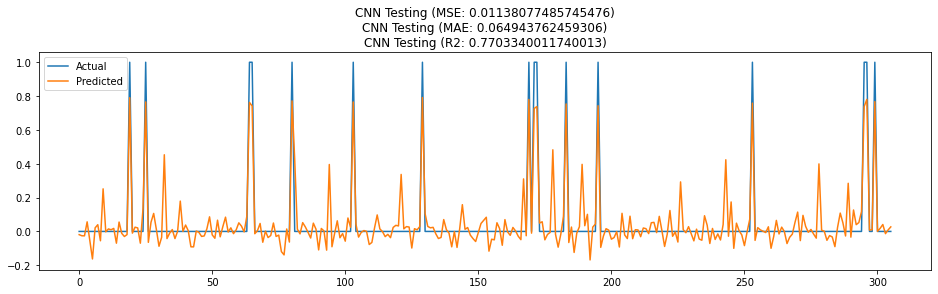

In [104]:
cnnValPred = model.predict(validationSeq_x)

cnnOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y,cnnValPred, "CNN Validation",range(len(validationSeq_y)))
plot_results(outSampleSeq_y,cnnOutSamplePred, "CNN Testing",range(len(outSampleSeq_y)))

In [105]:
from keras.layers import LSTM

np.random.seed(11)
rn.seed(10)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.random.set_seed(119)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

EarlyStop = EarlyStopping(monitor="val_loss",patience=10,verbose=0,mode="auto",restore_best_weights=True)
epochs = 1000

bs = 9
lr = 0

sgd = SGD(lr=lr)

n_steps_in = 2
n_steps_out = 1

trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in,n_steps_out)

validationSeq_x, validationSeq_y = split_sequences(valMinmax, n_steps_in, n_steps_out)

outSampleSeq_x, validation_y=split_sequences(outSampleMinmax, n_steps_in, n_steps_out)

X_useless, y_yseless = split_sequences(valMinmax, n_steps_in, n_steps_out)

n_features = X_useless.shape[2]
np.random.seed(0);print(np.random.rand(4))

model = Sequential()

model.add(LSTM(300,
               input_shape = (n_steps_in, n_features),
               activation="tanh"))

model.add(Dropout(0.1))
model.add(Dense(1,activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")

model.fit(trainSeq_x,trainSeq_y,
         batch_size=bs,
         epochs=epochs,
         callbacks=[EarlyStop],
         verbose=2,
         shuffle=False,
         validation_data = (validationSeq_x,validationSeq_y))


[0.5488135  0.71518937 0.60276338 0.54488318]
Epoch 1/1000
114/114 - 1s - loss: 0.0576 - val_loss: 0.0521
Epoch 2/1000
114/114 - 1s - loss: 0.0530 - val_loss: 0.0478
Epoch 3/1000
114/114 - 1s - loss: 0.0488 - val_loss: 0.0443
Epoch 4/1000
114/114 - 1s - loss: 0.0453 - val_loss: 0.0414
Epoch 5/1000
114/114 - 1s - loss: 0.0432 - val_loss: 0.0392
Epoch 6/1000
114/114 - 1s - loss: 0.0398 - val_loss: 0.0370
Epoch 7/1000
114/114 - 1s - loss: 0.0382 - val_loss: 0.0351
Epoch 8/1000
114/114 - 1s - loss: 0.0369 - val_loss: 0.0335
Epoch 9/1000
114/114 - 1s - loss: 0.0349 - val_loss: 0.0320
Epoch 10/1000
114/114 - 1s - loss: 0.0330 - val_loss: 0.0311
Epoch 11/1000
114/114 - 1s - loss: 0.0319 - val_loss: 0.0297
Epoch 12/1000
114/114 - 1s - loss: 0.0304 - val_loss: 0.0286
Epoch 13/1000
114/114 - 1s - loss: 0.0308 - val_loss: 0.0277
Epoch 14/1000
114/114 - 1s - loss: 0.0291 - val_loss: 0.0270
Epoch 15/1000
114/114 - 1s - loss: 0.0279 - val_loss: 0.0262
Epoch 16/1000
114/114 - 1s - loss: 0.0268 - val_

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               460800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 461,101
Trainable params: 461,101
Non-trainable params: 0
_________________________________________________________________


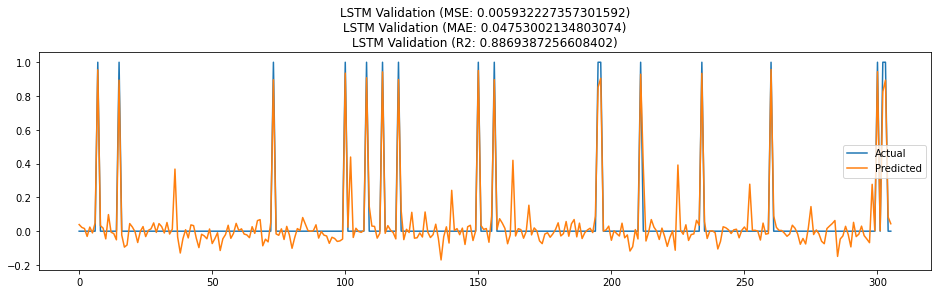

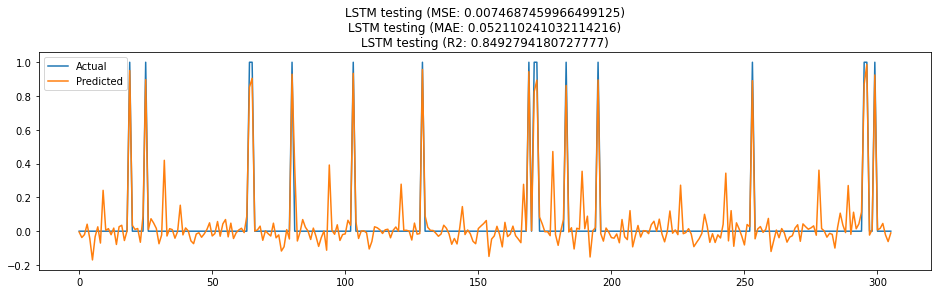

In [107]:
lstmValPred = model.predict(validationSeq_x)

lstmOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y, lstmValPred, "LSTM Validation",range(len(validationSeq_y)))
plot_results(outSampleSeq_y, lstmOutSamplePred, "LSTM testing",range(len(outSampleSeq_y)))

# Now we are going to put all models output into a dataframe for better visualization

In [108]:
infos = [["Ridge Regularization on train data",0.8904,0.0172,0.0940],
        ["Ridge Regularization on test data",0.8724,0.0209,0.1004],
        ["Lasso Regularization on train data",0.8912,0.0171,0.0938],
        ["Lasso Regularization on test data",0.8721,0.0210,0.1004],
        ["CNN Validation",0.8168,0.0096,0.06090],
        ["CNN Testing",0.7723,0.0113,0.0649],
        ["LSTM Validation",0.8869,0.0059,0.0475],
        ["LSTM Testing",0.8492,0.0074,0.0521]]

Scoreboard = pd.DataFrame(infos,columns=["Model Name", "R2","MSE","MAE"])
Scoreboard

,Model Name,R2,MSE,MAE
0,Ridge Regularization on train data,0.8904,0.0172,0.0940
1,Ridge Regularization on test data,0.8724,0.0209,0.1004
2,Lasso Regularization on train data,0.8912,0.0171,0.0938
3,Lasso Regularization on test data,0.8721,0.0210,0.1004
4,CNN Validation,0.8168,0.0096,0.0609
5,CNN Testing,0.7723,0.0113,0.0649
6,LSTM Validation,0.8869,0.0059,0.0475
7,LSTM Testing,0.8492,0.0074,0.0521


# Saving a Neural Network Model to use it later

In [109]:
import os
dirName = f"C:\\Users\\vyasd\\OneDrive\\New folder (2)\\Desktop\\Internship Flip Robo\\Project Housing\\output1"

try:
    os.mkdir(dirName)
    print("Directory " , dirName, "Created")
except FileExistsError:
    print("Directory" , dirName, "Already exists")
    
    
os.chdir(dirName)

model_name = "lstm"
filename = f"{model_name}_model.h5"
model.save(filename)

Directory  C:\Users\vyasd\OneDrive\New folder (2)\Desktop\Internship Flip Robo\Project Housing\output1 Created


## Calling a Saved Model

In [110]:
model_name="lstm"
filename = f"{model_name}_model.h5"
saved_model = keras.models.load_model(filename)

yhat = saved_model.predict(outSampleSeq_x)
mse = mean_squared_error(outSampleSeq_y,cnnOutSamplePred)
print(mse)

0.01138077485745476
